In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Get the numerical variables from our dataset.

data = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
numericals = data.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


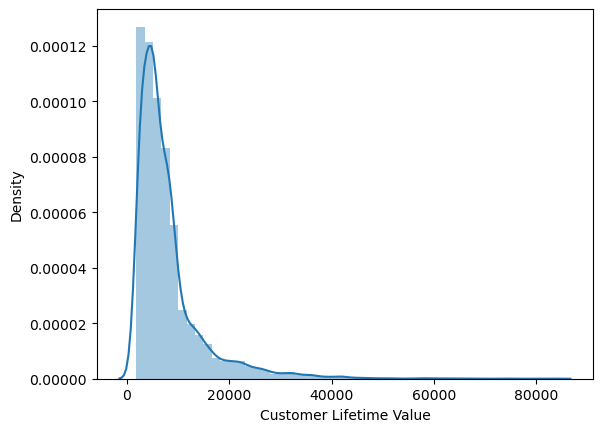

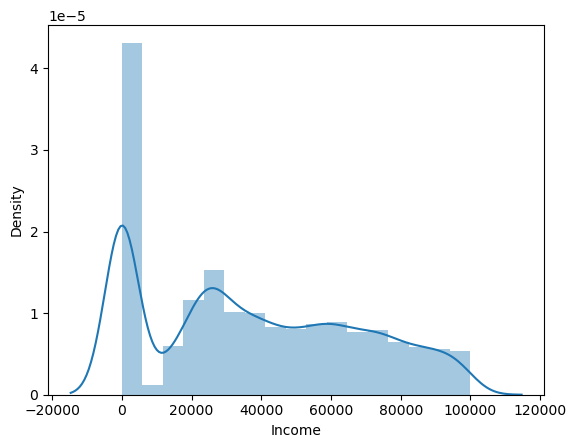

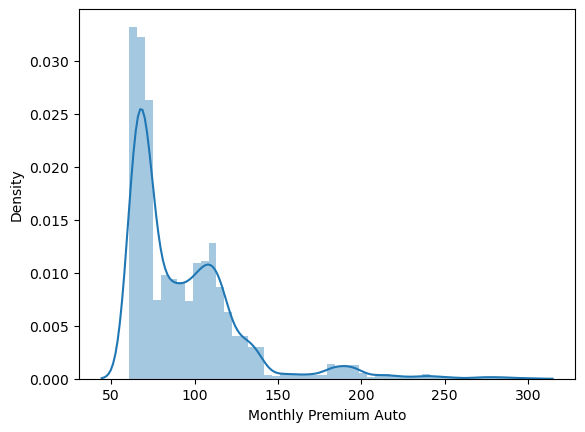

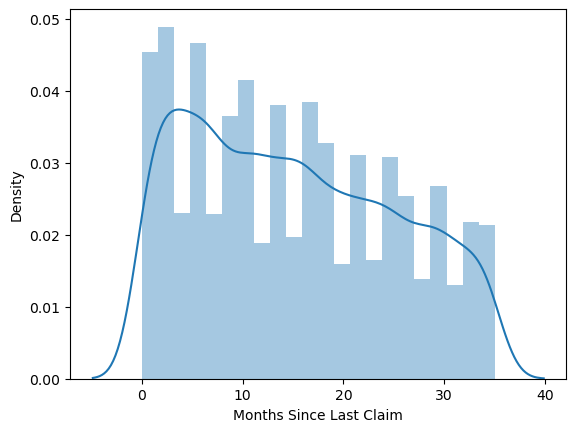

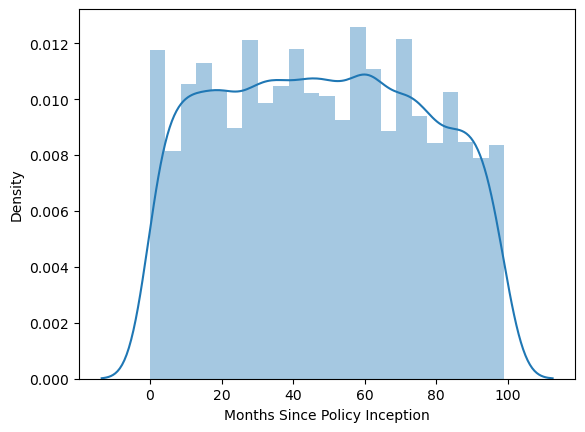

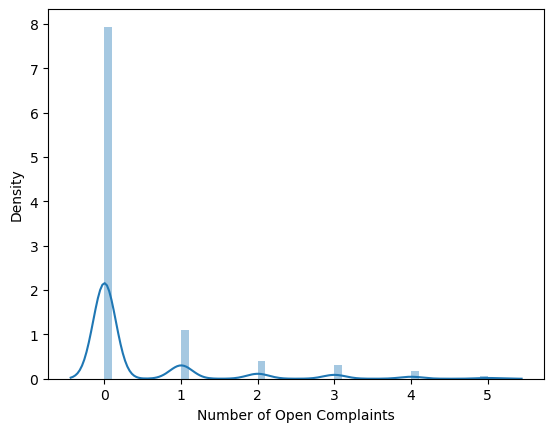

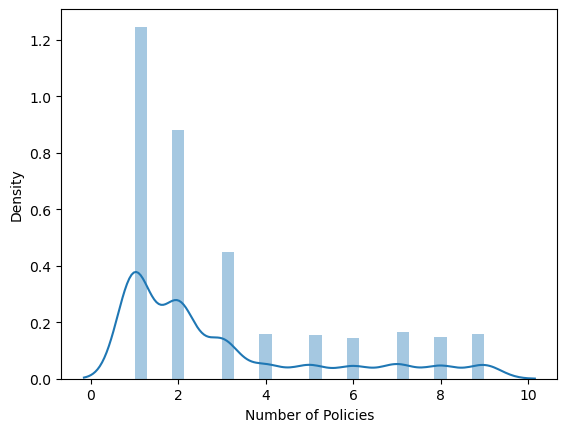

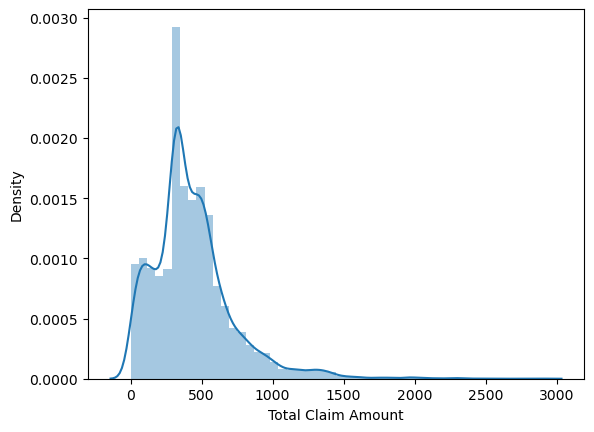

In [3]:
# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

for col in numericals:
    sns.distplot(data[col])
    plt.show()

- `Customer Lifetime Value`: exponential
- `Income`: normal
- `Monthly Premium Auto`: exponential
- `Months Since Last Claim`: normal?
- `Months Since Policy Inception`: normal?
- `Number of Open Complaints`: exponential
- `Number of Policies`: exponential
- `Total Claim Amount`: normal

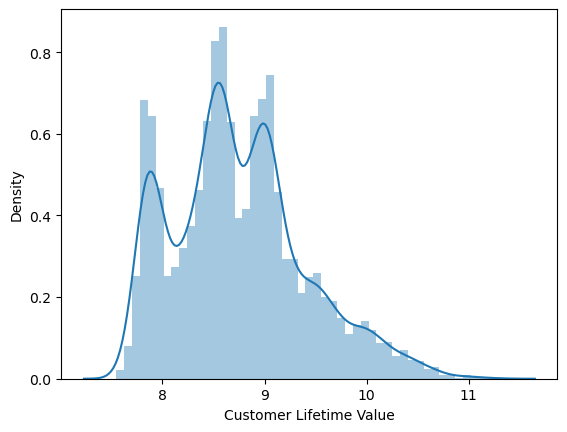

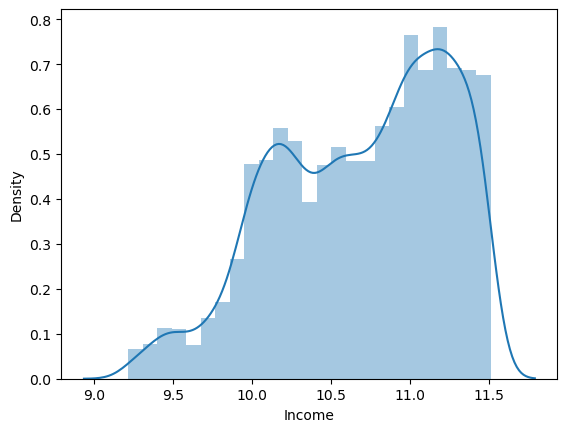

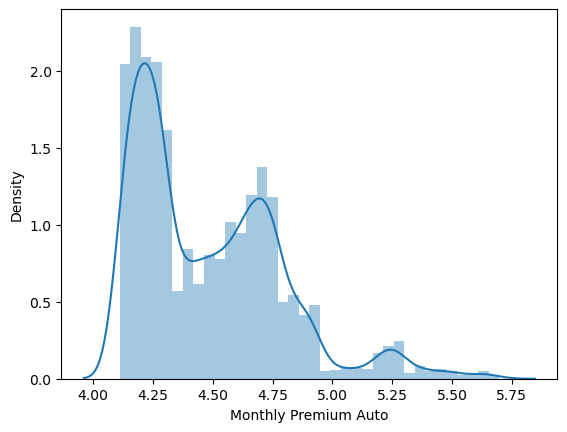

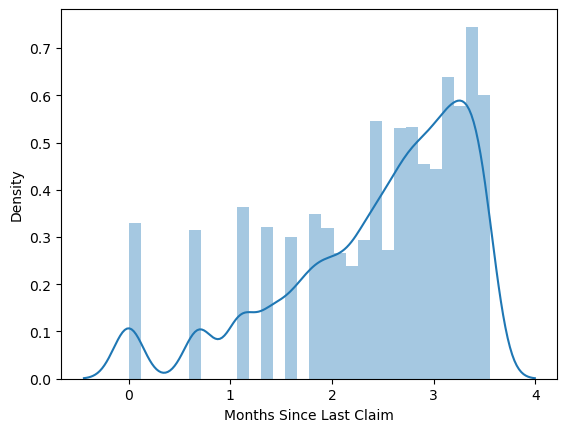

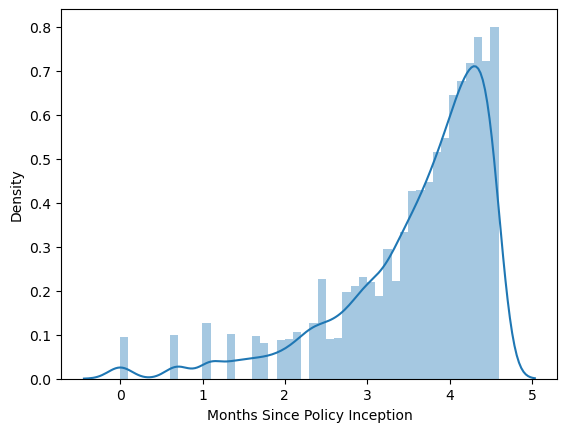

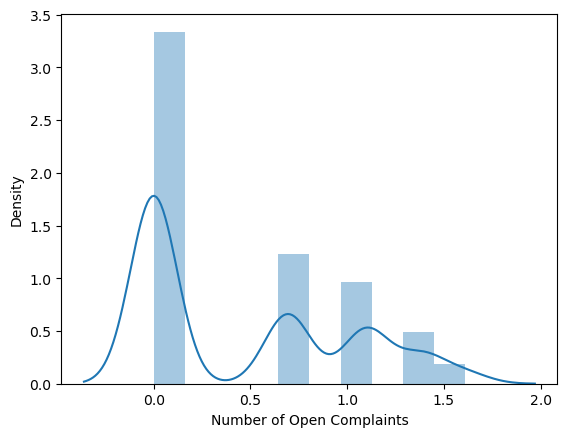

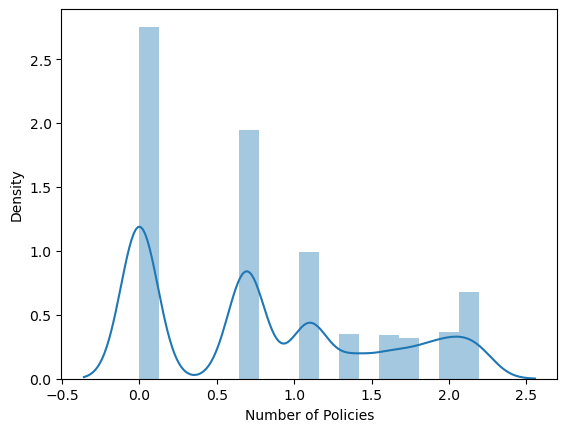

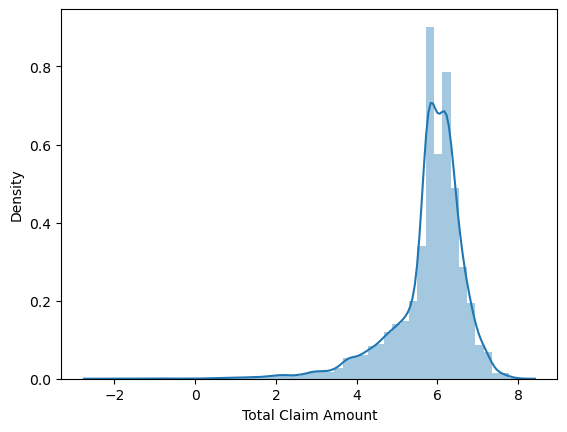

In [4]:
# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

# Log transformation

numericals_log = numericals.copy()
def log_tranform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
    
for col in numericals:
    numericals_log[col] = list(map(log_tranform_clean, numericals_log[col]))
    sns.distplot(numericals_log[col])
    plt.show()

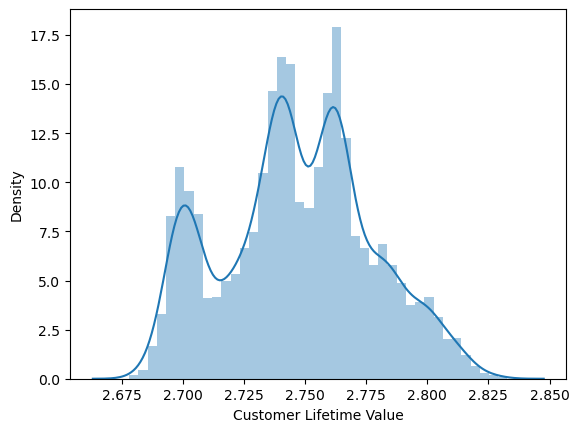

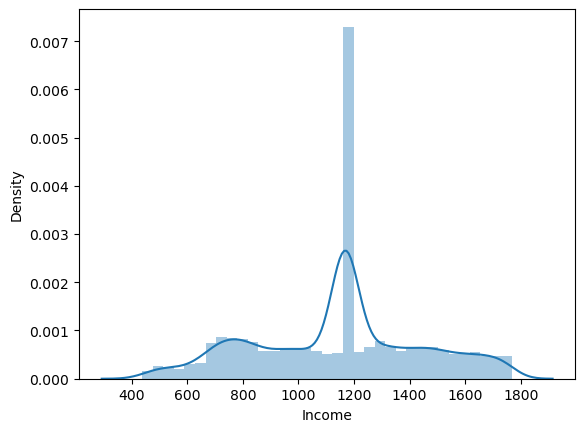

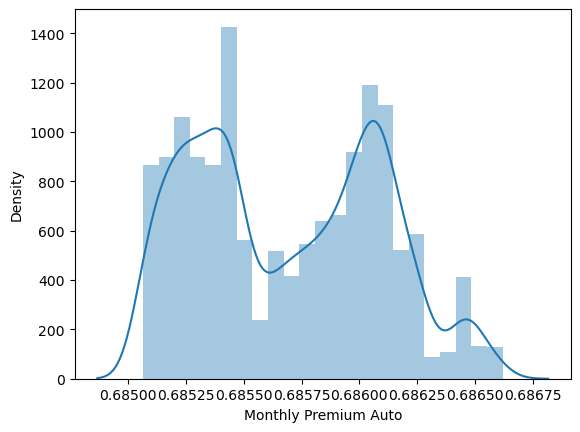

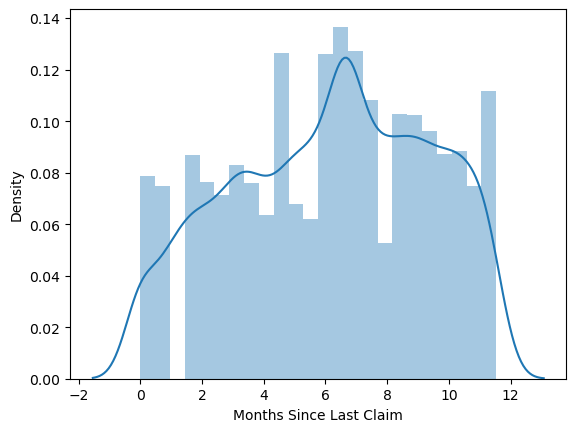

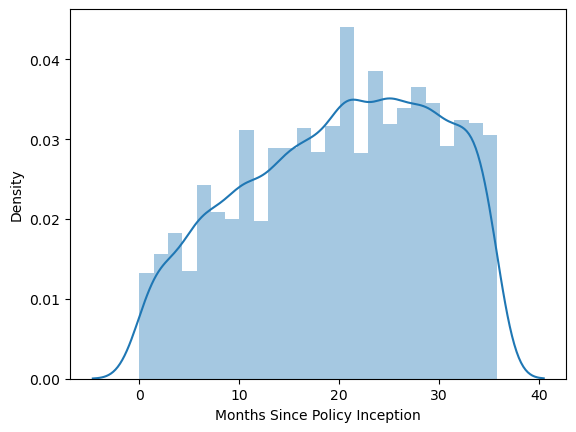

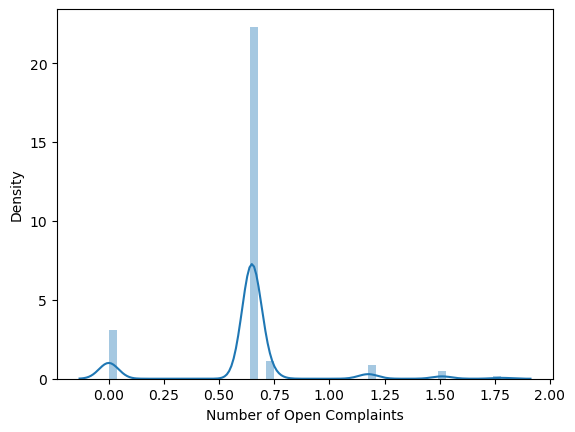

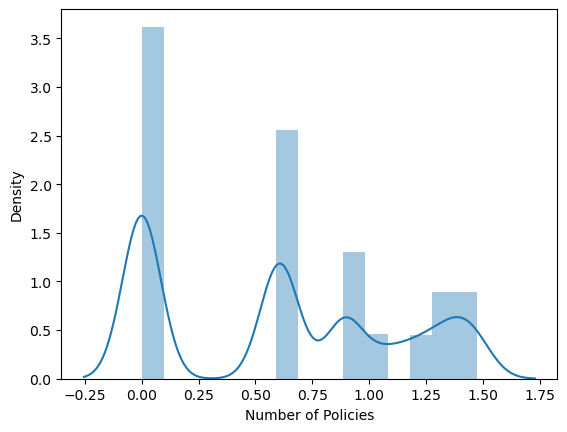

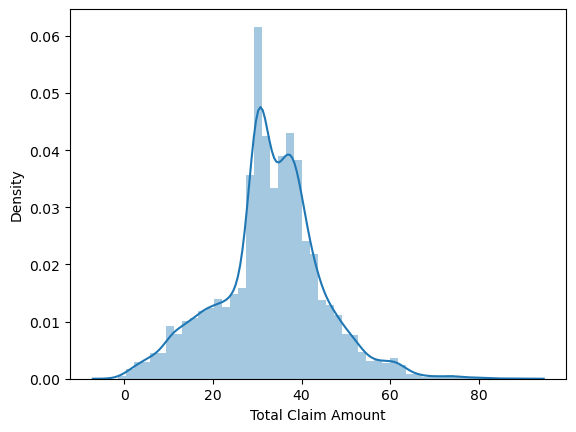

In [7]:
# Box cox transformation

numericals_boxcox = numericals.copy()

def boxcox_transform(df):
    for col in df:
        df[col] = np.where(df[col] <= 0, np.NAN, df[col]) 
        df[col] = df[col].fillna(df[col].mean())
        transformed_data, _ = stats.boxcox(df[col])
        df[col] = transformed_data
    return df

numericals_boxcox = boxcox_transform(numericals_boxcox)

for col in numericals:
    sns.distplot(numericals_boxcox[col])
    plt.show()

--> Box cox transformation looks better.